In [143]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Nc = 16
Nq = 3

epsilon = 0e6 * 2 * np.pi # note how the power has units of frequency here - a rate of photon addition
w_c  = 2 * np.pi * 5.0e9 # resonator frequency
w_q  = 2 * np.pi * 4e9 # qubit frequency
w_1 = 2 * np.pi * 5.0e9  # drive
phi_1 = 0*np.pi/2 # phase
kappa = 1e6 * 2 * np.pi           # cavity dissipation rate
alpha = 200e6 * 2 * np.pi
g = 100e6 * 2 * np.pi
T = 0
gamma = 0e6 * 2 * np.pi

c  = tensor(destroy(Nc), qeye(Nq))

q = tensor(qeye(Nc), destroy(Nq))

tlist = np.linspace(0, 2e-6, 20000)

H0 = w_c * c.dag() * c + w_q * q.dag() * q + alpha/2*q.dag()*q.dag()*q*q + g*(c.dag() + c)*(q.dag() + q)

H1_I = c # quadratures of the drive

H1_Q = c.dag()

cav_drive = epsilon*np.exp(1j*w_1*tlist + 1j*phi_1)

H = [[H0, tlist*0 + 1],[H1_I,cav_drive],[H1_Q,np.conj(cav_drive)]]

H0.eigenenergies()/(2*np.pi)

c_op_list = []

rate = gamma * (1 + T)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q)

rate = gamma * T
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q.dag())

rate = kappa
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * c)

psi_0 = tensor(coherent(Nc, 2), (fock(Nq, 0) + fock(Nq, 1))/np.sqrt(2))

In [144]:
result = mesolve(H, psi_0, tlist, c_ops = c_op_list)

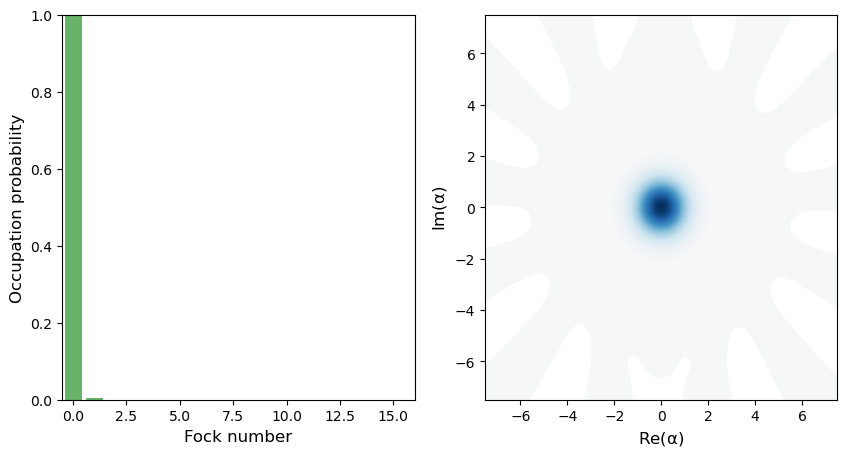

In [145]:
# i = 0

# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].cla()
# plot_fock_distribution(result.states[i], fig=fig, ax=axes[0])
# plot_wigner(result.states[i], fig=fig, ax=axes[1])
# plt.show()

i = -1

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].cla()
plot_fock_distribution(result.states[i].ptrace(0), fig=fig, ax=axes[0])
plot_wigner(result.states[i].ptrace(0), fig=fig, ax=axes[1])
plt.show()

In [146]:
psi_qb = result.states[i].ptrace(1)

In [147]:
(psi_qb*psi_qb).tr()

0.5759962144028946

In [148]:
H0.eigenstates()[0]/(2*np.pi)

array([-1.11179372e+06,  3.98791920e+09,  5.00768363e+09,  8.17533619e+09,
        9.00159126e+09,  1.00165011e+10,  1.31537696e+10,  1.40143201e+10,
        1.50253377e+10,  1.81330171e+10,  1.90262186e+10,  2.00341903e+10,
        2.31129893e+10,  2.40373792e+10,  2.50430562e+10,  2.80936122e+10,
        2.90478787e+10,  3.00519325e+10,  3.30748237e+10,  3.40577816e+10,
        3.50608168e+10,  3.80565712e+10,  3.90671431e+10,  4.00697065e+10,
        4.30388097e+10,  4.40760105e+10,  4.50785993e+10,  4.80215000e+10,
        4.90844252e+10,  5.00874929e+10,  5.30046083e+10,  5.40924234e+10,
        5.50963853e+10,  5.79881045e+10,  5.91000368e+10,  6.01052743e+10,
        6.29719624e+10,  6.41072938e+10,  6.51141582e+10,  6.79561588e+10,
        6.91142283e+10,  7.01230878e+10,  7.29409011e+10,  7.41238010e+10,
        7.51464862e+10,  7.79497580e+10,  7.92973463e+10,  8.32326840e+10])

In [149]:
(fock(Nq, 0) + fock(Nq, 1))/np.sqrt(2)

Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]
 [0.        ]]

In [150]:
result.states[i].ptrace(1)

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 7.09831369e-01+6.80999652e-14j  2.50619712e-03+6.97029205e-03j
  -1.11187402e-03+1.60161759e-03j]
 [ 2.50619712e-03-6.97029205e-03j  2.67382022e-01+2.70077567e-13j
  -6.82671377e-04+1.58102198e-03j]
 [-1.11187402e-03-1.60161759e-03j -6.82671377e-04-1.58102198e-03j
   2.27866083e-02+9.69476959e-14j]]

Text(0.5, 0, 'Time')

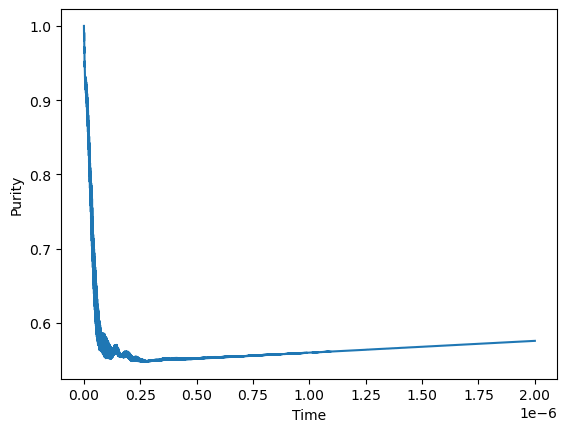

In [151]:
purity = tlist*0

for i in range(0, len(tlist)):
    
    psi_qb = result.states[i].ptrace(1)
    purity[i] = np.abs((psi_qb*psi_qb).tr())
    
plt.plot(tlist, purity)
plt.ylabel('Purity')
plt.xlabel('Time')
    

In [152]:
qb1 = bell_state('00').ptrace(0)

In [102]:
np.abs((qb1*qb1).tr())

np.float64(0.5000000000000002)